
# Importing  libraries


In [1]:
import pandas as pd
import numpy as np
from io import StringIO
import requests
#import tweepy
import os
import time
import json
import re
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

## (Gathering)


## Twitter Archived Enhanced csv


In [2]:
# load the twitter-archive-enhanced.csv into a DataFrame
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(5)  
#twitter_archive['source'].value_counts()
twitter_archive.info()
twitter_archive['doggo']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

0       None
1       None
2       None
3       None
4       None
        ... 
2351    None
2352    None
2353    None
2354    None
2355    None
Name: doggo, Length: 2356, dtype: object

## image_predictions.tsv

In [3]:
# Make directory if it doesn't already exist
folder_name= 'image_predictions.tsv'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
URL ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(URL) 
response
# with open to ues the file and close aout 
with open (URL.split('/')[-1], mode='wb') as file:
    file.write(response.content)

# image_predictions data  is loaded in df as and sep ues /t 
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## tweet-json.json

In [4]:
import json
user_followers_count =[]
user_favourites_count=[]
user_friends_count=[]
tweet_dataset = pd.read_json('tweet-json.json',lines=True)
for i in range(len(tweet_dataset)):
    user_followers_count.append(tweet_dataset['user'][i]['followers_count'])
    user_friends_count.append(tweet_dataset['user'][i]['friends_count'])
    user_favourites_count.append(tweet_dataset['user'][i]['favourites_count'])


In [5]:
df_tweets_json = pd.DataFrame(tweet_dataset, columns = ['retweet_count','favorite_count','created_at','full_text','id']) 
df_tweets_json

,retweet_count,favorite_count,created_at,full_text,id
0,8853,39467,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,892420643555336193
1,6514,33819,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,892177421306343426
2,4328,25461,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864
3,8964,42908,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,891689557279858688
4,9774,41048,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,891327558926688256
...,...,...,...,...,...
2349,41,111,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,666049248165822465
2350,147,311,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,666044226329800704
2351,47,128,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,666033412701032449
2352,48,132,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,666029285002620928


# rename the retweet count and favourite count to fiffer the between tweet and user 

In [6]:

df_tweets_json['user_followers_count'] = user_followers_count
df_tweets_json['user_friends_count'] = user_friends_count
df_tweets_json['user_favourites_count'] = user_favourites_count
df_tweets_json.rename(columns = {"id":"tweet_id","favorite_count":"tweet_favorite_count","retweet_count":"tweet_retweet_count"},inplace =True)

df_tweets_json

,tweet_retweet_count,tweet_favorite_count,created_at,full_text,tweet_id,user_followers_count,user_friends_count,user_favourites_count
0,8853,39467,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,892420643555336193,3200889,104,114031
1,6514,33819,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,892177421306343426,3200889,104,114031
2,4328,25461,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,891815181378084864,3200889,104,114031
3,8964,42908,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,891689557279858688,3200889,104,114031
4,9774,41048,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,891327558926688256,3200889,104,114031
...,...,...,...,...,...,...,...,...
2349,41,111,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,666049248165822465,3201018,104,114031
2350,147,311,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,666044226329800704,3201018,104,114031
2351,47,128,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,666033412701032449,3201018,104,114031
2352,48,132,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,666029285002620928,3201018,104,114031


## at this point all data is (Gathering) load and be visual aassessing 

## Assessing

In [7]:
#twitter_archive
twitter_archive.info()
twitter_archive.describe()
#tweet_dataset
tweet_dataset.info()
tweet_dataset.describe()
#df_tweets_json
df_tweets_json.info()
df_tweets_json.describe()
df_tweets_json['tweet_id']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2349    666049248165822465
2350    666044226329800704
2351    666033412701032449
2352    666029285002620928
2353    666020888022790149
Name: tweet_id, Length: 2354, dtype: int64

## Quality  Issues






# 1- Clean the content of source column, makes readable.

# 2- Refine p1, p2 and p3 columns and confidence 

#  as  the probapility of p2_conf and p3_conf both is lower than 0.5 we will drop theses unuesful coulums 

# 3-rename p1  , p1_dog and p1-conf makes it readable 

# 4- drop unusefull columns (in_reply_to_status_id), (in_reply_to_user_id ),(retweeted_status_timestamp) ,(retweeted_status_user_id), (retweeted_status_id)

# 5-  dropping duplicates  columns refar to datatime (created_at  ,timestamp  which is object not in a good format .

# 6- check and Delete duplicated tweet_id

# 7-change any none to NaN

# 8-ues text extract gthe dog name adds it to new coulme dog_name and drop the column name 


# tidiness issues


# 1- 3 dataframes into one to clean and process.

# 2- melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.


## clean

In [8]:
#copy dataframes
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
df_tweets_json_clean = df_tweets_json.copy()


# define
# 1: Resolve the biggest structural issue i.e. there should be 1 master table instead of 3 tables. Thus I am merging the 3 dataframes into one. And then we will have only 1 dataframe to clean and process.


# code 

In [9]:
twitter_archive_clean = pd.merge(left=twitter_archive_clean,
                                 right=df_tweets_json_clean, left_on='tweet_id', right_on='tweet_id', how='inner')

In [10]:
twitter_archive_clean = twitter_archive_clean.merge(image_predictions_clean, on='tweet_id', how='inner')

# test

In [11]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   object             
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

In [12]:
twitter_archive_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2069,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
2070,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
2071,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True



# define
# 2: Clean the content of source column, make it more readable.

# code

In [13]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract(r'>(.*)<', expand=False)

# test

In [14]:
twitter_archive_clean['source'].value_counts()

Twitter for iPhone    2032
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

# define
# 3: Refine p1, p2 and p3 columns and confidence 
# code

In [15]:
#most efective 
(twitter_archive_clean['p1_conf']>= 0.5).value_counts()


True     1238
False     835
Name: p1_conf, dtype: int64

# test

In [16]:
#lowest accurecy
(twitter_archive_clean['p2_conf']>=  0.5).value_counts()


False    2073
Name: p2_conf, dtype: int64

In [17]:
#lowest accurecy

(twitter_archive_clean['p3_conf']>=  0.5).value_counts()

False    2073
Name: p3_conf, dtype: int64

In [18]:
twitter_archive_clean['img_num'].value_counts()

1    1779
2     197
3      66
4      31
Name: img_num, dtype: int64

# define
#  as  the probapility of p2_conf and p3_conf both is lower than 0.5 we will drop theses unuesful coulums 
# code

In [19]:
twitter_archive_clean = twitter_archive_clean.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

# test

In [20]:

twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   object             
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

# define
# 4-rename p1  , p1_dog and p1-conf makes it readable 
# code

In [21]:
twitter_archive_clean.rename(columns = {"p1":"prediction"},inplace =True)
twitter_archive_clean.rename(columns = {"p1_conf":"confidence"},inplace =True)
twitter_archive_clean.rename(columns = {"p1_dog":"is_prediction_dog"},inplace =True)


# test

In [22]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2073 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2073 non-null   object             
 4   source                      2073 non-null   object             
 5   text                        2073 non-null   object             
 6   retweeted_status_id         79 non-null     float64            
 7   retweeted_status_user_id    79 non-null     float64            
 8   retweeted_status_timestamp  79 non-null     object             
 9   expanded_urls               2073 non-null   object             
 10  rating_numerator            2073 non-null   int64           

# define
# 5- remove retweet-related columns after removing rows with retweets as theese colums become empty, drop unusefull columns (in_reply_to_status_id), (in_reply_to_user_id ),(retweeted_status_timestamp) ,(retweeted_status_user_id), (retweeted_status_id)
# code

In [23]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_user_id.isnull()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.retweeted_status_timestamp.isnull()]
twitter_archive_clean = twitter_archive_clean.drop(['in_reply_to_user_id','in_reply_to_status_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], 1)


# test

In [24]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2072
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               1994 non-null   int64              
 1   timestamp              1994 non-null   object             
 2   source                 1994 non-null   object             
 3   text                   1994 non-null   object             
 4   expanded_urls          1994 non-null   object             
 5   rating_numerator       1994 non-null   int64              
 6   rating_denominator     1994 non-null   int64              
 7   name                   1994 non-null   object             
 8   doggo                  1994 non-null   object             
 9   floofer                1994 non-null   object             
 10  pupper                 1994 non-null   object             
 11  puppo                  1994 non-null   object           

# define
# 6-melting the 'doggo', 'floofer', 'pupper' and 'puppo' columns into one column life_stage.

In [25]:
twitter_archive_clean[ 'doggo'].value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [26]:
twitter_archive_clean[ 'floofer'].value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [27]:
twitter_archive_clean[ 'pupper'].value_counts()

None      1782
pupper     212
Name: pupper, dtype: int64

In [28]:
twitter_archive_clean[ 'puppo'].value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

# code 

In [29]:
dog_type = ['doggo', 'floofer', 'pupper', 'puppo']
# Melt the the columns into values
all_columns_list = twitter_archive_clean.columns.tolist()
del all_columns_list[8:12]
twitter_archive_clean  = pd.melt(twitter_archive_clean, id_vars = all_columns_list, value_vars = dog_type, 
                         var_name = 'all_life_stages', value_name = 'dog_stage_of_life')

twitter_archive_clean = twitter_archive_clean.drop(['all_life_stages'],1)

# test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               7976 non-null   int64              
 1   timestamp              7976 non-null   object             
 2   source                 7976 non-null   object             
 3   text                   7976 non-null   object             
 4   expanded_urls          7976 non-null   object             
 5   rating_numerator       7976 non-null   int64              
 6   rating_denominator     7976 non-null   int64              
 7   name                   7976 non-null   object             
 8   tweet_retweet_count    7976 non-null   int64              
 9   tweet_favorite_count   7976 non-null   int64              
 10  created_at             7976 non-null   datetime64[ns, UTC]
 11  full_text              7976 non-null   object           

# define 
# 7:  dropping duplicates  columns refar to datatime (created_at  ,timestamp  which is object not in a good format .
# code

In [31]:

# change timestamp format which is object not in a good format to datatime
twitter_archive_clean['timestamp'] =  pd.to_datetime(twitter_archive_clean['timestamp'] , format='%Y-%m-%d %H:%M:%S')
# drop datatime as dublicated
twitter_archive_clean = twitter_archive_clean.drop(['timestamp'],1)

# test

In [32]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7976 entries, 0 to 7975
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               7976 non-null   int64              
 1   source                 7976 non-null   object             
 2   text                   7976 non-null   object             
 3   expanded_urls          7976 non-null   object             
 4   rating_numerator       7976 non-null   int64              
 5   rating_denominator     7976 non-null   int64              
 6   name                   7976 non-null   object             
 7   tweet_retweet_count    7976 non-null   int64              
 8   tweet_favorite_count   7976 non-null   int64              
 9   created_at             7976 non-null   datetime64[ns, UTC]
 10  full_text              7976 non-null   object             
 11  user_followers_count   7976 non-null   int64            

# define
# 8: check and Delete duplicated tweet_id
# code

In [33]:
#check duplicated tweet_id
(twitter_archive_clean.duplicated()).value_counts()

True     5665
False    2311
dtype: int64

In [34]:
#Delete duplicated tweet_id
twitter_archive_clean = twitter_archive_clean.drop_duplicates()

In [35]:
#check duplicated tweet_id 
(twitter_archive_clean.duplicated()).value_counts()

False    2311
dtype: int64

# test

In [36]:
twitter_archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 6795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2311 non-null   int64              
 1   source                 2311 non-null   object             
 2   text                   2311 non-null   object             
 3   expanded_urls          2311 non-null   object             
 4   rating_numerator       2311 non-null   int64              
 5   rating_denominator     2311 non-null   int64              
 6   name                   2311 non-null   object             
 7   tweet_retweet_count    2311 non-null   int64              
 8   tweet_favorite_count   2311 non-null   int64              
 9   created_at             2311 non-null   datetime64[ns, UTC]
 10  full_text              2311 non-null   object             
 11  user_followers_count   2311 non-null   int64            

# define
# 9 change any none to NaN
# code

In [37]:
#CHECK None and convert it to NaN 
for col in list(twitter_archive_clean):
    x= (twitter_archive_clean[col] == None).value_counts()
print(x)
twitter_archive_clean =  twitter_archive_clean.replace('None', np.nan)

False    2311
Name: dog_stage_of_life, dtype: int64


# test

In [38]:
#CHECK AGAIN
for col in list(twitter_archive_clean):
    x= (twitter_archive_clean[col] == None).value_counts()
    print("CHECK IF ANY NUBER OF NONE : " ,x)

CHECK IF ANY NUBER OF NONE :  False    2311
Name: tweet_id, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: source, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: text, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: expanded_urls, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: rating_numerator, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: rating_denominator, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: name, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: tweet_retweet_count, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: tweet_favorite_count, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: created_at, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: full_text, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: user_followers_count, dtype: int64
CHECK IF ANY NUBER OF NONE :  False    2311
Name: user_friends_count, dty

In [39]:
twitter_archive_clean.isnull().sum()

tweet_id                    0
source                      0
text                        0
expanded_urls               0
rating_numerator            0
rating_denominator          0
name                      669
tweet_retweet_count         0
tweet_favorite_count        0
created_at                  0
full_text                   0
user_followers_count        0
user_friends_count          0
user_favourites_count       0
jpg_url                     0
img_num                     0
prediction                  0
confidence                  0
is_prediction_dog           0
dog_stage_of_life        1994
dtype: int64

# define
# 10 ues text extract gthe dog name adds it to new coulme dog_name and drop the column name 
# code

In [40]:
twitter_archive_clean['text'][87]


"Say hello to Lassie. She's celebrating #PrideMonth by being a splendid mix of astute and adorable. Proudly supupporting her owner. 13/10 https://t.co/uK6PNyeh9w"

In [41]:
twitter_archive_clean['text'][115]

'This is Paisley. She ate a flower just to prove she could. Savage af. 13/10 would pet so well https://t.co/cPq9fYvkzr'

In [42]:
twitter_archive_clean['text'][154]

"At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk"

In [43]:
twitter_archive_clean['text'][1960 ]

'Oh boy what a pup! Sunglasses take this one to the next level. Weirdly folds front legs. Pretty big. 6/10 https://t.co/yECbFrSArM'

In [44]:
#twitter_archive_clean['name'] = twitter_archive_clean['text'].str.extract(r'(../..)', expand=False)
x = twitter_archive_clean['text'].str.extract(r'([\w]*?\.)', expand=False)
x =x.str.replace('\.','')
x = x.mask(x.str.match(r'^[a-z]+$'))
for i in x :
    x = x.replace('Dog', 'Zeke')
    x = x.replace('Ohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboyohboy', np.nan)
    x = x.replace('Maximus', np.nan)
    x = x.replace('DR', np.nan)
    x = x.replace('', np.nan)
    x = x.replace('Wow', 'Armored')
    x = x.replace('III', 'Kingsley Wellensworth III')
    x = x.replace('Well', np.nan)
    x = x.replace('K9VeteransDay', np.nan)
    x = x.replace('Improvement', np.nan)
    x = x.replace('ScienceMarch', np.nan)
    x = x.replace('Unbelievable', np.nan)
    x = x.replace('We', np.nan)
    x = x.replace('HI', np.nan)
    x = x.replace('a', np.nan) 
    x = x.replace('Up', np.nan) 
    x = x.replace('Islands', np.nan)
    x = x.replace('Setter', np.nan)
    x = x.replace('2', np.nan)
    x = x.replace('10', np.nan)
    x = x.replace('130', np.nan)
    x = x.replace('37', np.nan)
    x = x.replace('(^\d*)', np.nan)
#for i in range(len(x)):
    #print(i,x[i])
#x.isnull().sum()
twitter_archive_clean['dog_name'] = x

# test 

In [45]:
twitter_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,tweet_retweet_count,tweet_favorite_count,created_at,...,user_followers_count,user_friends_count,user_favourites_count,jpg_url,img_num,prediction,confidence,is_prediction_dog,dog_stage_of_life,dog_name
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,2017-08-01 16:23:56+00:00,...,3200889,104,114031,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,NaN,Phineas
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,6514,33819,2017-08-01 00:17:27+00:00,...,3200889,104,114031,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,NaN,Tilly
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,4328,25461,2017-07-31 00:18:03+00:00,...,3200889,104,114031,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,NaN,Archie
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,8964,42908,2017-07-30 15:58:51+00:00,...,3200889,104,114031,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,NaN,Darla
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,9774,41048,2017-07-29 16:00:24+00:00,...,3200889,104,114031,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,NaN,Franklin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,752519690950500352,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,NaN,3917,8157,2016-07-11 15:07:30+00:00,...,3200943,104,114031,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,puppo,Monday
6691,751132876104687617,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,Cooper,1480,5610,2016-07-07 19:16:47+00:00,...,3200943,104,114031,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390,True,puppo,Cooper
6753,744995568523612160,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,Abby,716,3277,2016-06-20 20:49:19+00:00,...,3200943,104,114031,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,puppo,Abby
6764,743253157753532416,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,Kilo,1366,4624,2016-06-16 01:25:36+00:00,...,3200943,104,114031,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,puppo,Kilo


# define 
# drop the name coloum replace with dog_name 
# code

In [46]:
twitter_archive_clean = twitter_archive_clean.drop(['name'],1)

# Test

In [47]:
twitter_archive_clean

,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,tweet_retweet_count,tweet_favorite_count,created_at,full_text,user_followers_count,user_friends_count,user_favourites_count,jpg_url,img_num,prediction,confidence,is_prediction_dog,dog_stage_of_life,dog_name
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,8853,39467,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,3200889,104,114031,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,NaN,Phineas
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,6514,33819,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,3200889,104,114031,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,NaN,Tilly
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,4328,25461,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,3200889,104,114031,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,NaN,Archie
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,8964,42908,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,3200889,104,114031,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,NaN,Darla
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,9774,41048,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,3200889,104,114031,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,NaN,Franklin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6680,752519690950500352,Twitter for iPhone,Hopefully this puppo on a swing will help get ...,https://twitter.com/dog_rates/status/752519690...,11,10,3917,8157,2016-07-11 15:07:30+00:00,Hopefully this puppo on a swing will help get ...,3200943,104,114031,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,swing,0.999984,False,puppo,Monday
6691,751132876104687617,Twitter for iPhone,This is Cooper. He's just so damn happy. 10/10...,https://twitter.com/dog_rates/status/751132876...,10,10,1480,5610,2016-07-07 19:16:47+00:00,This is Cooper. He's just so damn happy. 10/10...,3200943,104,114031,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390,True,puppo,Cooper
6753,744995568523612160,Twitter for iPhone,This is Abby. She got her face stuck in a glas...,https://twitter.com/dog_rates/status/744995568...,9,10,716,3277,2016-06-20 20:49:19+00:00,This is Abby. She got her face stuck in a glas...,3200943,104,114031,https://pbs.twimg.com/media/ClbBg4WWEAMjwJu.jpg,1,Old_English_sheepdog,0.427481,True,puppo,Abby
6764,743253157753532416,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,https://twitter.com/dog_rates/status/743253157...,10,10,1366,4624,2016-06-16 01:25:36+00:00,This is Kilo. He cannot reach the snackum. Nif...,3200943,104,114031,https://pbs.twimg.com/media/ClCQzFUUYAA5vAu.jpg,1,malamute,0.442612,True,puppo,Kilo


In [48]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 6795
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2311 non-null   int64              
 1   source                 2311 non-null   object             
 2   text                   2311 non-null   object             
 3   expanded_urls          2311 non-null   object             
 4   rating_numerator       2311 non-null   int64              
 5   rating_denominator     2311 non-null   int64              
 6   tweet_retweet_count    2311 non-null   int64              
 7   tweet_favorite_count   2311 non-null   int64              
 8   created_at             2311 non-null   datetime64[ns, UTC]
 9   full_text              2311 non-null   object             
 10  user_followers_count   2311 non-null   int64              
 11  user_friends_count     2311 non-null   int64            

# define
# save master data frame

# code 

In [49]:
twitter_archive_clean.to_csv('twitter_archive_clean.csv', index=False)

# visualizations and analyses  


# Visualization 1 
#  Analyses: this is the most frequent dog name
# code

([<matplotlib.patches.Wedge at 0x1a042b1da30>,
 [Text(0.9552064052176444, 0.8818053772977262, 'Charlie'),
  Text(-0.6897448790119771, 0.9819633403934962, 'Cooper'),
  Text(-1.0927617270324617, -0.4958546237891021, 'Oliver'),
  Text(0.09574335134032877, -1.1961744064617512, 'Tucker'),
  Text(1.0648224992873685, -0.5533109839967052, 'Lucy')])

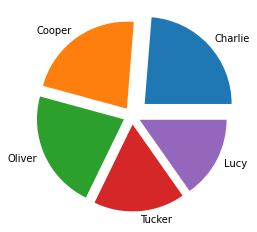

In [50]:
dog_name_count = twitter_archive_clean.dog_name.value_counts().head(5)
dog_name_count
labels_sources = ['Charlie','Cooper', 'Oliver','Tucker', 'Lucy']
explode =(0.2, 0.1, 0.1,0.1,0.1)
plt.pie(dog_name_count,explode = explode,labels = labels_sources)

In [51]:
dog_name_count

Charlie    14
Cooper     13
Oliver     13
Lucy       10
Winston     9
Name: dog_name, dtype: int64

In [52]:
count_dogs = twitter_archive_clean.groupby('dog_stage_of_life')['tweet_id'].count()
count_dogs

dog_stage_of_life
doggo       74
floofer      8
pupper     212
puppo       23
Name: tweet_id, dtype: int64

# Visualization 2 
#  Analyses: this is the most frequent Dog stage of life 
# code

Text(0, 0.5, 'Count')

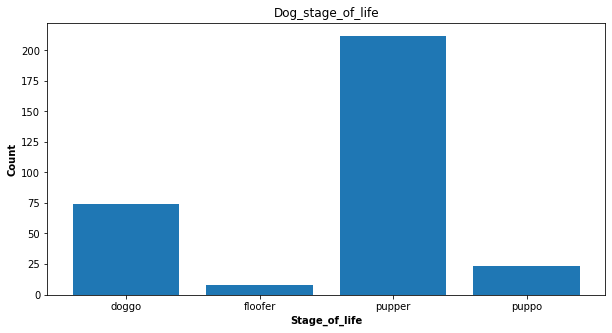

In [53]:
plt.subplots(figsize=(10, 5))
plt.bar([1, 2, 3, 4], count_dogs, tick_label=['doggo','floofer','pupper', 'puppo'])
plt.title('Dog_stage_of_life')
plt.xlabel('Stage_of_life', weight='bold')
plt.ylabel('Count', weight='bold')

# Visualization 3 
#  Analyses: a very big  correlation between the tweet(retweets and favorites).
# code

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

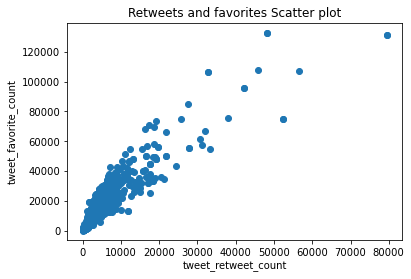

In [54]:
plt.scatter( twitter_archive_clean['tweet_retweet_count'],twitter_archive_clean['tweet_favorite_count'])
plt.xlabel('tweet_retweet_count')
plt.ylabel('tweet_favorite_count')
plt.title('Retweets and favorites Scatter plot')

# Visualization 4 
#  Analyses: the most  tweetes are frequent tweets ues (Twitter for iPhone)
# code

Text(0, 0.5, 'Count')

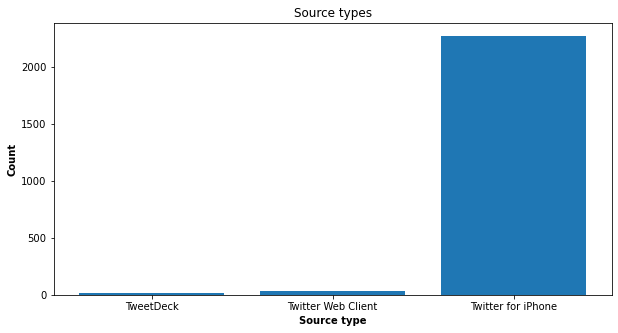

In [55]:
count_source = twitter_archive_clean.groupby('source')['tweet_id'].count()
count_source
plt.subplots(figsize=(10, 5))
plt.bar([1, 2, 3], count_source, tick_label=['TweetDeck','Twitter Web Client','Twitter for iPhone'])
plt.title('Source types')
plt.xlabel('Source type', weight='bold')
plt.ylabel('Count', weight='bold')

# Visualization 5
#  Analyses: the tweetes(tweet_retweet_count,tweet_favorite_count ) not effected by  user_followers_count
# code

Text(0.5, 1.0, 'Retweets and user_followers Scatter plot')

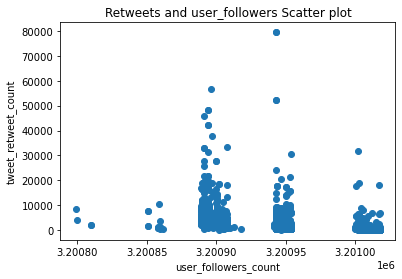

In [56]:

plt.scatter( twitter_archive_clean['user_followers_count'],twitter_archive_clean['tweet_retweet_count'])
plt.xlabel('user_followers_count')
plt.ylabel('tweet_retweet_count')
plt.title('Retweets and user_followers Scatter plot')

Text(0.5, 1.0, 'Retweets and user_followers Scatter plot')

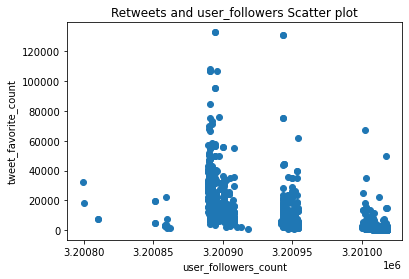

In [57]:
plt.scatter( twitter_archive_clean['user_followers_count'],twitter_archive_clean['tweet_favorite_count'])
plt.xlabel('user_followers_count')
plt.ylabel('tweet_favorite_count')
plt.title('Retweets and user_followers Scatter plot')